## XGBoost Testing new Features

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# metrics
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

#xgb
import xgboost as xgb

In [86]:
training = pd.read_csv('../test/training-person2.csv')
test = pd.read_csv('../test/test-person2.csv')
sumbit = test['person'].to_frame()

In [88]:
RANDOM_SEED = 12
TEST_SIZE_PERCENT = 0.2

In [89]:
y = training['label']
X = training.drop(axis=1, labels=['label'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=TEST_SIZE_PERCENT, random_state=RANDOM_SEED)

feature_list = list(X.columns)

In [90]:
X.columns

Index(['event', 'ad campaign hit', 'brand listing', 'checkout', 'conversion',
       'generic listing', 'lead', 'search engine hit', 'searched products',
       'staticpage', 'viewed product', 'visited site', 'brand_categ',
       'top_condition_categ', 'color_model_categ', 'model_brand_views_categ',
       'device_type_categ', 'returning', 'ad campaign hit days',
       'brand listing days', 'checkout days', 'conversion days',
       'generic listing days', 'lead days', 'search engine hit days',
       'searched products days', 'staticpage days', 'viewed product days',
       'visited site days', 'events_cout_last_week',
       'events_mean_frec_last_week', 'top_event_categ',
       'top_searched_model_categ', 'region_categ', 'city_categ',
       'country_categ', 'last_event_days', 'first_event_days',
       'checkout mean last week', 'conversion mean last week'],
      dtype='object')

In [91]:
# best kaggle score sin mean para cada user
rdf3 = xgb.XGBClassifier(learning_rate=0.05, n_estimators=130, max_depth=3,
 min_child_weight=5, gamma=0.3, subsample=0.7, colsample_bytree=0.6, reg_alpha = 0.1, seed=RANDOM_SEED)

rdf = xgb.XGBClassifier(learning_rate=0.01, n_estimators=600, max_depth=3,
 min_child_weight=5, gamma=0, subsample=0.7, colsample_bytree=0.6, reg_alpha =0.1,objective= 'binary:logistic',seed=RANDOM_SEED)

In [92]:
# Training
rdf.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_delta_step=0,
       max_depth=3, min_child_weight=5, missing=None, n_estimators=600,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, seed=12,
       silent=True, subsample=0.7)

In [93]:
# Predict value
ret = rdf.predict_proba(X_test)

In [94]:
y_test_predictd = ret[:, 1]
roc_auc_score(y_test, y_test_predictd)
#0.8691145494532726

0.8693481605385704

In [95]:
rdf.score(X_test, y_test)

/home/bautista/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9454030388874581

In [96]:
# Predict value kaggle set
# Training
rdf.fit(X, y)
ret = rdf.predict_proba(test.drop(axis=1, labels=['person']))

In [97]:
# Get proba
sumbit['label'] = pd.DataFrame(ret)[1]

Text(0.5,1,'Prediccion Probabilidad de Conversion')

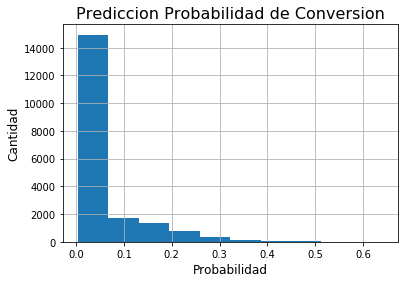

In [98]:
g = (sumbit['label']).hist()
g.set_ylabel('Cantidad', size=12)
g.set_xlabel('Probabilidad', size=12)
g.set_title("Prediccion Probabilidad de Conversion", size=16)

In [99]:
# Get numerical feature importances
importances = list(rdf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 7)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: checkout days        Importance: 0.08266279846429825
Variable: conversion days      Importance: 0.07802979648113251
Variable: device_type_categ    Importance: 0.05730310082435608
Variable: checkout mean last week Importance: 0.05608389899134636
Variable: region_categ         Importance: 0.047549400478601456
Variable: viewed product       Importance: 0.046086300164461136
Variable: event                Importance: 0.045842498540878296
Variable: city_categ           Importance: 0.042184799909591675
Variable: conversion           Importance: 0.038770999759435654
Variable: search engine hit days Importance: 0.03657640144228935
Variable: color_model_categ    Importance: 0.03365030139684677
Variable: events_cout_last_week Importance: 0.03316260129213333
Variable: brand_categ          Importance: 0.0302364993840456
Variable: checkout             Importance: 0.02950499951839447
Variable: generic listing days Importance: 0.02901729941368103
Variable: viewed product days  Importance: 0.

In [100]:
sumbit.to_csv('test/submit-XGB-GS.csv', index=False)